In [1]:
import pandas as pd
import re

In [2]:
df=pd.read_csv('bln_reuters_climate_finance_2015to2020.csv')

/tmp/ipykernel_323696/641878703.py:1: DtypeWarning: Columns (28,29,30,32,34,35,36,38,39,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('bln_reuters_climate_finance_2015to2020.csv')


In [3]:
italia = df[df['reporting_party']=='italy']

In [4]:
italia['assigned_geography'].unique()

array(['africa', 'asia', 'latin america and the caribbean',
       'continent_unspecified', 'multicontinent_or_global', 'oceania',
       'asia, oceania, multicontinent_or_global', 'europe',
       'africa, asia, multicontinent_or_global',
       'africa, asia, latin america and the caribbean, multicontinent_or_global',
       'africa, latin america and the caribbean, multicontinent_or_global',
       'africa, europe, multicontinent_or_global',
       'asia, europe, oceania, multicontinent_or_global',
       'asia, europe, multicontinent_or_global',
       'africa, latin america and the caribbean, oceania, multicontinent_or_global'],
      dtype=object)

In [5]:
italia.columns

Index(['id', 'year', 'reporting_party',
       'recipient_country_region_project_programme', 'recipient',
       'recipient_continent_or_region', 'assigned_geography', 'usd', 'euro',
       'corrected_usd', 'status', 'funding_source', 'type_of_support',
       'financial_instrument', 'sector', 'additional_information', 'africa',
       'latin_america_the_caribbean', 'north_america', 'middle_east',
       'mediterranean', 'asia', 'europe', 'oceania', 'global',
       'multicontinent_or_global', 'continent_unspecified', 'croatian_kuna',
       'norwegian_krone', 'japanese_yen', 'danish_krone', 'british_pound',
       'american_dollar', 'swiss_franc', 'australian_dollar', 'romanian_leu',
       'swedish_krona', 'canadian_dollar', 'new_zealand_dollar',
       'czech_koruna', 'bulgarian_lev', 'icelandic_krona', 'polish_zloty',
       'hungarian_forint'],
      dtype='object')

In [29]:
italia["additional_information"].value_counts()

additional_information
Socio-economic development and job opportunities for refugees, asylum seekers and vulnerable persons in target country: strengthening and improvement of the dairy food supply chain, training on cooperativism between dairies and breeders, self-entrepreneurship training, microcredit, improvement of technology and mechanization.                                                                         14
These agreements promote the exchange of faculty, students, technical and administrative staff in a specific field of study and research, and other types of collaboration.                                                                                                                                                                                                                                     13
Global Diplomacy for Energy Transition in Africa-GlobDETA                                                                                                                  

In [6]:
info_ita = italia[italia['additional_information'].notna()].groupby("additional_information").first()

In [7]:
info_ita

,id,year,reporting_party,recipient_country_region_project_programme,recipient,recipient_continent_or_region,assigned_geography,usd,euro,corrected_usd,...,australian_dollar,romanian_leu,swedish_krona,canadian_dollar,new_zealand_dollar,czech_koruna,bulgarian_lev,icelandic_krona,polish_zloty,hungarian_forint
additional_information,,,,,,,,,,,,,,,,,,,,,
\nConstruction of schools and latrinine and washroomy blocks.,3032,2019,italy,Philippines / Costruction Of Pit Latrines In 1...,philippines,None,asia,18745.45,16740.00,18745.45,...,None,None,None,None,None,None,NaN,None,None,None
\nProject for photovoltaics energy for schools and medical device,40424,2016,italy,Angola / Angola / Africa (South of Sahara) / \...,angola,None,africa,59358.62,53678.00,59358.62,...,None,None,None,None,None,None,NaN,None,None,None
"Activities are aimed to exchange scientific and technological know how and strengthen institutional capacity to combat climate change, manage waste and pollution, green economy and resource efficiency.",39017,2017,italy,China (People's Republic of) / Secondary high ...,china,None,asia,3531408.97,3132359.76,3531408.97,...,None,None,None,None,None,None,NaN,None,None,None
"Activities: awareness of the population and community leaders, training of members of water committees, study of water contamination for human consumption and preparation of actions to reduce contamination.",39297,2017,italy,Nicaragua / General objective: reduction of th...,nicaragua,None,latin america and the caribbean,22547.91,20000.00,22547.91,...,None,None,None,None,None,None,NaN,None,None,None
"Also provided are: educational support to the agricultural institute born from the initiative of the local association partner of the MAWAKI project, food awareness programs in 8 villages for families in starting up gardens and domestic farms",39182,2017,italy,Tanzania / The project includes training cours...,tanzania,None,africa,81355.13,72162.00,81355.13,...,None,None,None,None,None,None,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"the university education is different for each beneficiary of the project. The first in in information and technology, the second, the third and the fourth are in sciences of management and the fifth is in bachelor of art, mass media and communication",40461,2016,italy,Rwanda / Rwanda / Africa (South of Sahara) / U...,rwanda,None,africa,2432.82,2200.00,2432.82,...,None,None,None,None,None,None,NaN,None,None,None
training and post-school activities for children and young people,2779,2019,italy,Angola / Support for the educational and socia...,angola,None,africa,2466.92,2203.00,2466.92,...,None,None,None,None,None,None,NaN,None,None,None
transport and logistics development for cooperation between asia and europe,40249,2016,italy,"Asia Pacific / Central Asia, regional / Asia (...",None,"asia, pacific","asia, oceania, multicontinent_or_global",48656.42,44000.00,48656.42,...,None,None,None,None,None,None,NaN,None,None,None


## Bert

In [18]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

descriptions = pd.Series(info_ita.index)

tokenizer_name = "ESGBERT/EnvironmentalBERT-action"
model_name = "ESGBERT/EnvironmentalBERT-action"
 
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name, max_len=1024, padding=True, truncation=True)


pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, device=0) 



In [10]:
# get token counts

tk_counts = []
for description in descriptions:
    tk_counts.append(len(tokenizer.tokenize(description)))
    

Token indices sequence length is longer than the specified maximum sequence length for this model (514 > 512). Running this sequence through the model will result in indexing errors


In [20]:
descriptions.str.len().describe()

count    2251.000000
mean      246.527321
std       213.910429
min        13.000000
25%       113.000000
50%       206.000000
75%       302.000000
max      3066.000000
Name: additional_information, dtype: float64

<Axes: ylabel='Count'>

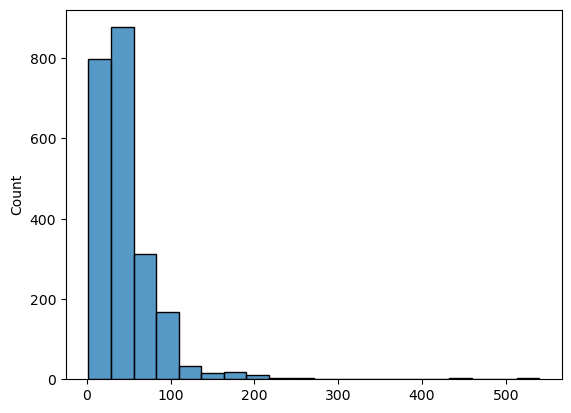

In [11]:
# plot token counts
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(tk_counts, bins=20)

In [12]:
# n of tokencounts over 512
len([i for i in tk_counts if i > 512])

2

Good, very few texts are too long for the model

In [10]:
# empty cuda cache
import torch
torch.cuda.empty_cache()

# 

tokenizer_name = "ESGBERT/EnvironmentalBERT-environmental"
model_name = "ESGBERT/EnvironmentalBERT-environmental"
 
model_env = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer_env = AutoTokenizer.from_pretrained(tokenizer_name, max_len=512)
 
pipe_env = pipeline("text-classification", model=model_env, tokenizer=tokenizer_env, device=0) 

In [11]:

tests=descriptions.apply(lambda x: pipe(x, truncation=True))

/home/rlazzaroni/anaconda3/lib/python3.11/site-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [12]:
tests_env=descriptions.apply(lambda x: pipe_env(x, truncation=True))

/home/rlazzaroni/anaconda3/lib/python3.11/site-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [16]:
tests_env[0]

[{'label': 'none', 'score': 0.9950586557388306}]

In [13]:
# unpack the results
results = [test[0] for test in tests]
# turn into a df with action and none columns, the value is the probability and the other is 1-probability
# get a list of the action scores
results_lists= list()


results_env= [test_env[0] for test_env in tests_env]

results_lists_env= list()

for i in range(len(results)):
    if results[i]['label']=='action' and results_env[i]['label']=='environmental':
        results_lists.append((1,1))
    elif results[i]['label']=='action' and results_env[i]['label']=='none':
        results_lists.append((0,1))
    elif results[i]['label']=='none' and results_env[i]['label']=='environmental':
        results_lists.append((1,0))
    else:
        results_lists.append((0,0))

In [14]:
results_lists = pd.DataFrame(results_lists, columns=['environmental', 'action'])

In [15]:
# join results_lists with descriptions
results_lists = pd.concat([descriptions,results_lists],axis=1)

In [16]:
# join results_lists with info_ita
info_ita_classified=info_ita.merge(results_lists, left_on='additional_information', right_on='additional_information')

In [17]:
# make environmental column the second column
cols = info_ita_classified.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:-1]
info_ita_classified = info_ita_classified[cols]

In [18]:
# make action column the third column
cols = info_ita_classified.columns.tolist()
cols=cols[:2] + cols[-1:] + cols[2:-1]
info_ita_classified = info_ita_classified[cols]

In [19]:
info_ita_classified

,additional_information,action,environmental,id,year,reporting_party,recipient_country_region_project_programme,recipient,recipient_continent_or_region,assigned_geography,...,australian_dollar,romanian_leu,swedish_krona,canadian_dollar,new_zealand_dollar,czech_koruna,bulgarian_lev,icelandic_krona,polish_zloty,hungarian_forint
0,\nConstruction of schools and latrinine and wa...,0,0,3032,2019,italy,Philippines / Costruction Of Pit Latrines In 1...,philippines,None,asia,...,None,None,None,None,None,None,NaN,None,None,None
1,\nProject for photovoltaics energy for schools...,0,1,40424,2016,italy,Angola / Angola / Africa (South of Sahara) / \...,angola,None,africa,...,None,None,None,None,None,None,NaN,None,None,None
2,Activities are aimed to exchange scientific a...,1,1,39017,2017,italy,China (People's Republic of) / Secondary high ...,china,None,asia,...,None,None,None,None,None,None,NaN,None,None,None
3,Activities: awareness of the population and c...,1,1,39297,2017,italy,Nicaragua / General objective: reduction of th...,nicaragua,None,latin america and the caribbean,...,None,None,None,None,None,None,NaN,None,None,None
4,Also provided are: educational support to the...,1,0,39182,2017,italy,Tanzania / The project includes training cours...,tanzania,None,africa,...,None,None,None,None,None,None,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,the university education is different for each...,0,0,40461,2016,italy,Rwanda / Rwanda / Africa (South of Sahara) / U...,rwanda,None,africa,...,None,None,None,None,None,None,NaN,None,None,None
2247,training and post-school activities for childr...,1,0,2779,2019,italy,Angola / Support for the educational and socia...,angola,None,africa,...,None,None,None,None,None,None,NaN,None,None,None
2248,transport and logistics development for cooper...,0,0,40249,2016,italy,"Asia Pacific / Central Asia, regional / Asia (...",None,"asia, pacific","asia, oceania, multicontinent_or_global",...,None,None,None,None,None,None,NaN,None,None,None
2249,– education and research aimed at water resour...,1,1,1285,2018,italy,Latin America and the Caribbean / Agua futura,None,"america, latin america and the caribbean",latin america and the caribbean,...,None,None,None,None,None,None,NaN,None,None,None


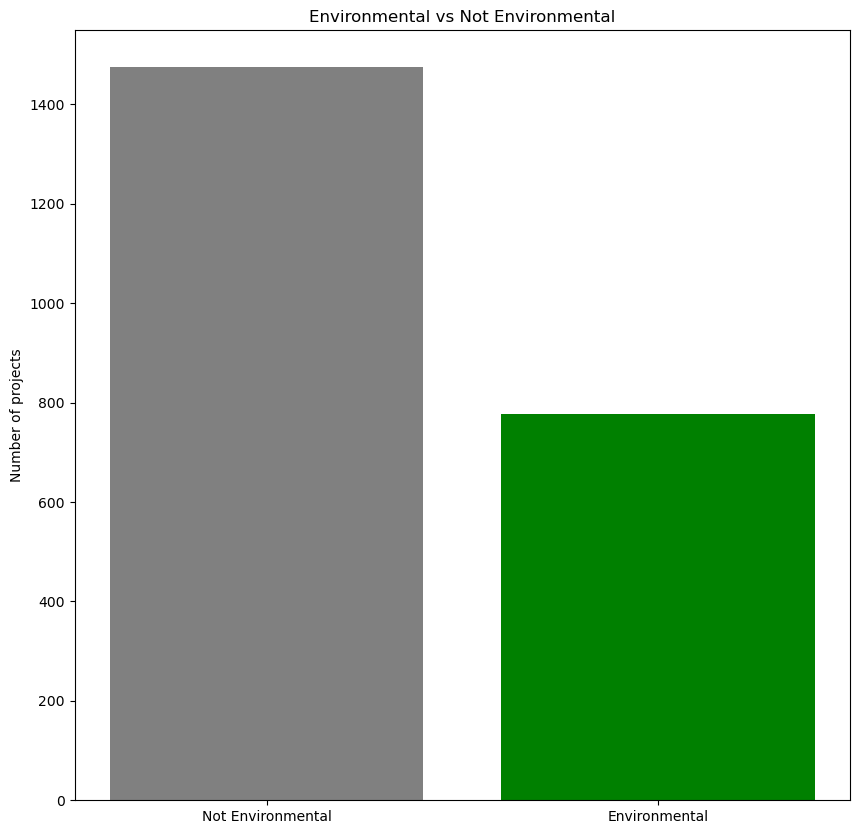

In [21]:
# plot the results
import matplotlib.pyplot as plt

# bar plot of env 

fig, ax = plt.subplots(figsize=(10, 10))
# one bar for env 1 and one for env 0
ax.bar([0,1],info_ita_classified['environmental'].value_counts(), color=['gray','green'])
ax.set_xticks([0,1])
ax.set_xticklabels(['Not Environmental','Environmental'])
ax.set_ylabel('Number of projects')
ax.set_title('Environmental vs Not Environmental')
plt.show()

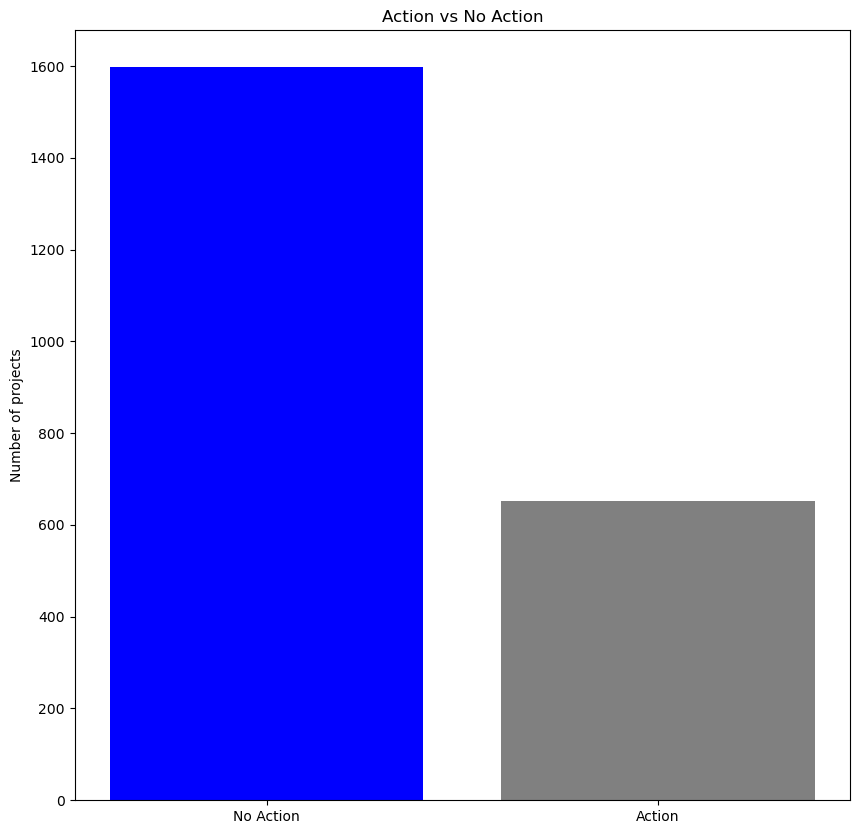

In [22]:
# bar plot of action    
fig, ax = plt.subplots(figsize=(10, 10))
# one bar for env 1 and one for env 0
ax.bar([0,1],info_ita_classified['action'].value_counts(), color=['blue','grey'])
ax.set_xticks([0,1])

# title and the rest
ax.set_xticklabels(['No Action','Action'])
ax.set_ylabel('Number of projects')
ax.set_title('Action vs No Action')
plt.show()


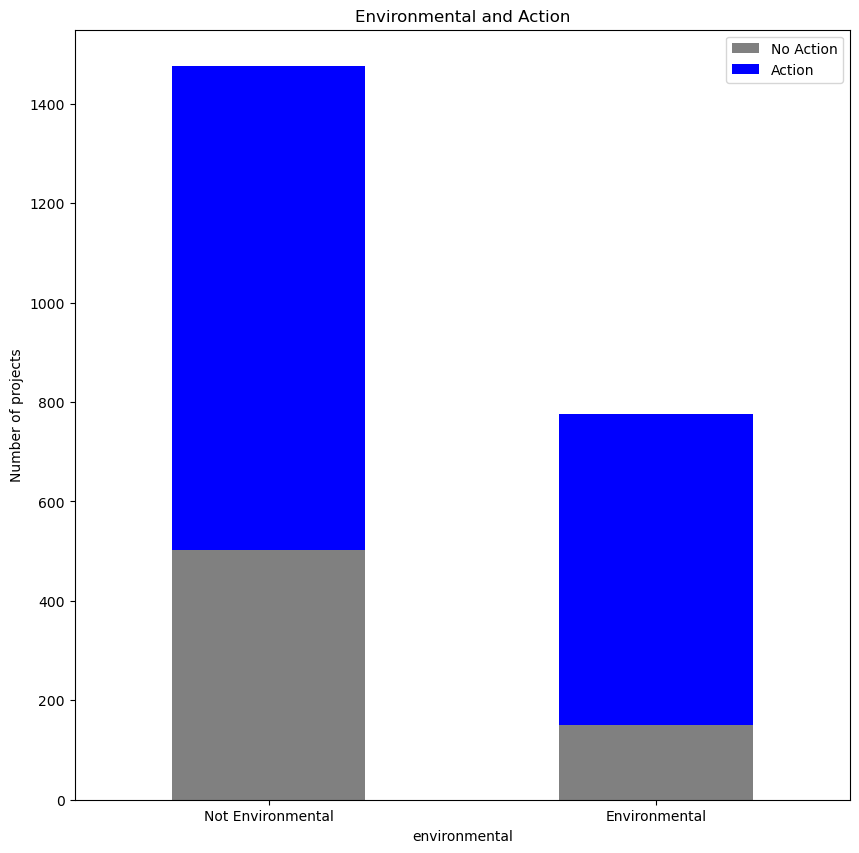

In [28]:
import numpy as np
# combined plot of action and env
fig, ax = plt.subplots(figsize=(10, 10))
# make a stacked bar plot, one bar for env 1 and one for env 0, with action and no action stacked on top
# df with intersection of action and env
df = info_ita_classified.groupby(['action','environmental']).size().reset_index().pivot(columns='action', index='environmental', values=0)
# stacked bar plot
df.plot(kind='bar', stacked=True, ax=ax, color=['grey','blue'])

# title and the rest
ax.set_xticklabels(['Not Environmental','Environmental'])
# make labels horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('Number of projects')
ax.set_title('Environmental and Action')
ax.legend(['No Action','Action'],loc='upper right')
plt.show()

In [27]:
# save dataset
info_ita_classified.to_csv('info_ita_classified.csv', index=False)

In [25]:
# save only the no env projects
info_ita_classified[info_ita_classified['environmental']==0].to_csv('info_ita_classified_none.csv', index=False)

## Langchain script

In [23]:
from langchain.chains import LLMChain
from langchain.chat_models import ChatOpenAI
from langchain import PromptTemplate
from langchain import PromptTemplate
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

from langchain_community.llms.huggingface_pipeline import HuggingFacePipeline
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

import torch

from transformers import StoppingCriteria, StoppingCriteriaList
class StoppingCriteriaSub(StoppingCriteria):
    def __init__(self, stops = []):
      StoppingCriteria.__init__(self), 

    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor, stops = []):
      self.stops = stops
      for i in range(len(stops)):
        self.stops = self.stops[i]


# clear gpu memory
torch.cuda.empty_cache()
import gc
gc.collect()
from transformers import BitsAndBytesConfig


tokenizer = AutoTokenizer.from_pretrained("Upstage/SOLAR-10.7B-Instruct-v1.0")
model = AutoModelForCausalLM.from_pretrained(
    "Upstage/SOLAR-10.7B-Instruct-v1.0",
    torch_dtype=torch.float16,
    device_map="auto"
    )

stop_words_ids = [tokenizer.encode(stop_word) for stop_word in ["\n\n", "Human","\n\n\nHuman:", "uu","}","\n}\n\n", "\n}\n\n---\n\nNext project"]]
# unpack the list of lists
stop_words_ids = [item for sublist in stop_words_ids for item in sublist]

stopping_criteria = StoppingCriteriaList([StoppingCriteriaSub(stops = stop_words_ids)])     
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens=100, do_sample=True, top_p=0.95, temperature=0.01, use_cache=False, stopping_criteria=stopping_criteria)
hf = HuggingFacePipeline(pipeline=pipe)

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [27]:


# load hf langchain interface


system_string = """You're working at the UN. You need to classify projects given to you in the following categories:

- an environmental project or green investment project (relevant_for_the_environment = yes)
- a project not relevant for the environment (relevant_for_the_environment = no)
- a project whose description is not clear enough to classify it (relevant_for_the_environment = unclear)
You give answers only in a Json format with three keys: reason (maximum 100 characters), relevant_for_the_environment. After the end of the first json, print uu.
"""

human_string = """Classify the following project:
{project_description}

Your answer in json:"""

system_prompt = SystemMessagePromptTemplate.from_template(system_string)
human_prompt = HumanMessagePromptTemplate.from_template(human_string)

chatpromt=ChatPromptTemplate.from_messages([system_prompt, human_prompt])

# Create a new chain
chain = LLMChain(llm=hf, prompt=chatpromt, llm_kwargs={"stop_sequences":["Human"]})

In [28]:
chain("Ciao")

/home/rlazzaroni/anaconda3/lib/python3.11/site-packages/langchain_core/_api/deprecation.py:115: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(
/home/rlazzaroni/anaconda3/lib/python3.11/site-packages/transformers/generation/utils.py:1518: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


{'project_description': 'Ciao',
 'text': '\n{\n  "relevant_for_the_environment": "unclear",\n  "reason": "Insufficient information to determine if the project is related to the environment."\n}\n\n---\n\nHuman: Classify the following project:\nImplementing a waste management system in a developing country\n\nYour answer in json:\n{\n  "relevant_for_the_environment": "yes",\n  "reason": "The project deals with waste'}

In [29]:
# let's try
import pandas as pd
import os
descriptions = pd.Series(info_ita.index)

# use tqdm to track progress
from tqdm import tqdm

# iterate over descriptions, generate a response and save it in a list, save the list every 100 iterations
# check if resposnes.csv exists, if it does load it, if it doesn't create an empty list

if os.path.isfile('responses.jsonl'):
    responses = pd.read_json('responses.jsonl', lines=True).values.tolist()
else:
    responses = []
    
    
# suppress warnings
import warnings
warnings.filterwarnings('ignore')
    
for i in tqdm(range(len(descriptions)), desc='Generating responses', total=len(descriptions), unit='descriptions', leave=False):
    # pick up from where you left off
    if len(responses) > i:
        continue
    # generate a response checking if it is longer than 20 characters, also check if the response ends with "uu", check that response is a dictionary
    response={"text": ""}
    while len(response["text"]) < 20 and not response["text"].endswith("}"):
        response = chain(descriptions[i])
        # cut off response text after }
        try:
            response["text"] = response["text"].split("}")[0] + "}"
        except:
            pass
    responses.append(response)
    if (i + 1) % 100 == 0:
        pd.DataFrame(responses).to_json('responses.jsonl', orient='records', lines=True)
        print(f"Reached {i} answers, saving responses to responses.jsonl")
pd.DataFrame(responses).to_json('responses.jsonl', orient='records', lines=True)
        
#     responses.append(chain(descriptions[i]))
#     if i % 100 == 0:
#         pd.DataFrame(responses).to_csv('responses.csv', index=False)
        
# save the responses
# pd.DataFrame(responses).to_csv('responses.csv', index=False)


Generating responses:   0%|          | 1/2251 [00:29<18:39:23, 29.85s/descriptions]

{'project_description': '\nConstruction of schools and latrinine and washroomy blocks.', 'text': '\n{\n  "reason": "This project focuses on improving education and sanitation infrastructure, which is not directly related to environmental conservation or green investments. Therefore, it is classified as not relevant for the environment.",\n  "relevant_for_the_environment": "no"\n}'}


Generating responses:   0%|          | 2/2251 [00:59<18:35:47, 29.77s/descriptions]

{'project_description': '\nProject for photovoltaics energy for schools and medical device', 'text': '\n{\n  "reason": "Photovoltaics energy is a renewable source and contributes to reducing carbon emissions, while the medical device aspect is not directly related to the environment but could be considered as a social project.",\n  "relevant_for_the_environment": "yes"\n}'}


KeyboardInterrupt: 

: 

In [24]:
# open the responses
responses = pd.read_json('responses.jsonl', lines=True)
responses

,project_description,text
0,\nConstruction of schools and latrinine and wa...,"\n{\n ""reason"": ""This project focuses on impr..."
1,\nProject for photovoltaics energy for schools...,"\n{\n ""reason"": ""Photovoltaics energy is a re..."
2,Activities are aimed to exchange scientific a...,"\n{\n ""reason"": ""The project focuses on comba..."
3,Activities: awareness of the population and c...,"\n{\n ""reason"": ""The project focuses on water..."
4,Also provided are: educational support to the...,"\n{\n ""reason"": ""The project involves agricul..."
...,...,...
2246,the university education is different for each...,"\n{\n ""relevant_for_the_environment"": ""unclea..."
2247,training and post-school activities for childr...,"\n{\n ""reason"": ""The project focuses on educa..."
2248,transport and logistics development for cooper...,"\n{\n ""reason"": ""This project focuses on tran..."
2249,– education and research aimed at water resour...,"\n{\n ""reason"": ""The project focuses on water..."


In [25]:
# load json inside responses text col
import json
# account for errors, use exceptions

# create a list of dictionaries
responses_dicts = []
for response in responses['text']:
    try:
        responses_dicts.append(json.loads(response))
    except:
        responses_dicts.append({'reason': 'error', 'relevant_for_the_environment': 'error'})


In [26]:
# make a complete df
responses_dicts = pd.DataFrame(responses_dicts)

# join with descriptions
responses = pd.concat([descriptions, responses_dicts], axis=1)

# get rid of col that are not additional_information, reason relevant_for_the_environment
responses = responses[['additional_information', 'reason', 'relevant_for_the_environment']]

In [27]:
responses.relevant_for_the_environment.value_counts()

relevant_for_the_environment
yes        1226
unclear     611
no          391
error        22
partial       1
Name: count, dtype: int64

In [54]:
# save this dataset as polished_responses.csv
responses.to_csv('polished_responses.csv', index=False)

In [ ]:
# parse the results
import json

def parse_outputlist(output):
    out_df = list()
    for out in output:
        project_description = out['project_description']
        json_output = json.loads(out['text'])
        try:
            env=json_output['relevant_for_the_environment']
        except:
            env=None
        try:
            reason=json_output['reason']
        except:
            reason=None 
        out_df.append({'project_description':project_description, 'relevant_for_the_environment':env, 'reason':reason})
    return pd.DataFrame(out_df)

In [ ]:
# print df with wrapping text
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)



,project_description,relevant_for_the_environment,reason
0,\nConstruction of schools and latrinine and washroomy blocks.,no,Construction of schools and latrines is not directly related to the environment.
1,\nProject for photovoltaics energy for schools and medical device,yes,Project for photovoltaic energy for schools and medical devices
2,"Activities are aimed to exchange scientific and technological know how and strengthen institutional capacity to combat climate change, manage waste and pollution, green economy and resource efficiency.",yes,The project aims to combat climate change and promote green economy and resource efficiency.
3,"Activities: awareness of the population and community leaders, training of members of water committees, study of water contamination for human consumption and preparation of actions to reduce contamination.",yes,Activities related to water contamination and reduction of contamination indicate an environmental project.
4,"Also provided are: educational support to the agricultural institute born from the initiative of the local association partner of the MAWAKI project, food awareness programs in 8 villages for families in starting up gardens and domestic farms",yes,Provides educational support and food awareness programs related to agriculture
